In [104]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import contextily as ctx
from shapely.geometry import Point
import xyzservices.providers as xyz
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import pandas as pd


In [105]:
# Load the DHL Facilities data
dhl_geojson = gpd.read_file('DHL_Facilities.geojson')

# Drop the 'ADDRESS2' column
dhl_geojson = dhl_geojson.drop('ADDRESS2', axis=1)

# Rename the 'OBJECTID' column to 'ID'
dhl_geojson = dhl_geojson.rename(columns={'OBJECTID': 'ID'})

# Fill missing values in 'PLACEMENT' column with forward fill
dhl_geojson['PLACEMENT'] = dhl_geojson['PLACEMENT'].fillna(method='ffill')


C:\Users\Murad Aladdinzada\AppData\Local\Temp\ipykernel_12196\1159664376.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dhl_geojson['PLACEMENT'] = dhl_geojson['PLACEMENT'].fillna(method='ffill')


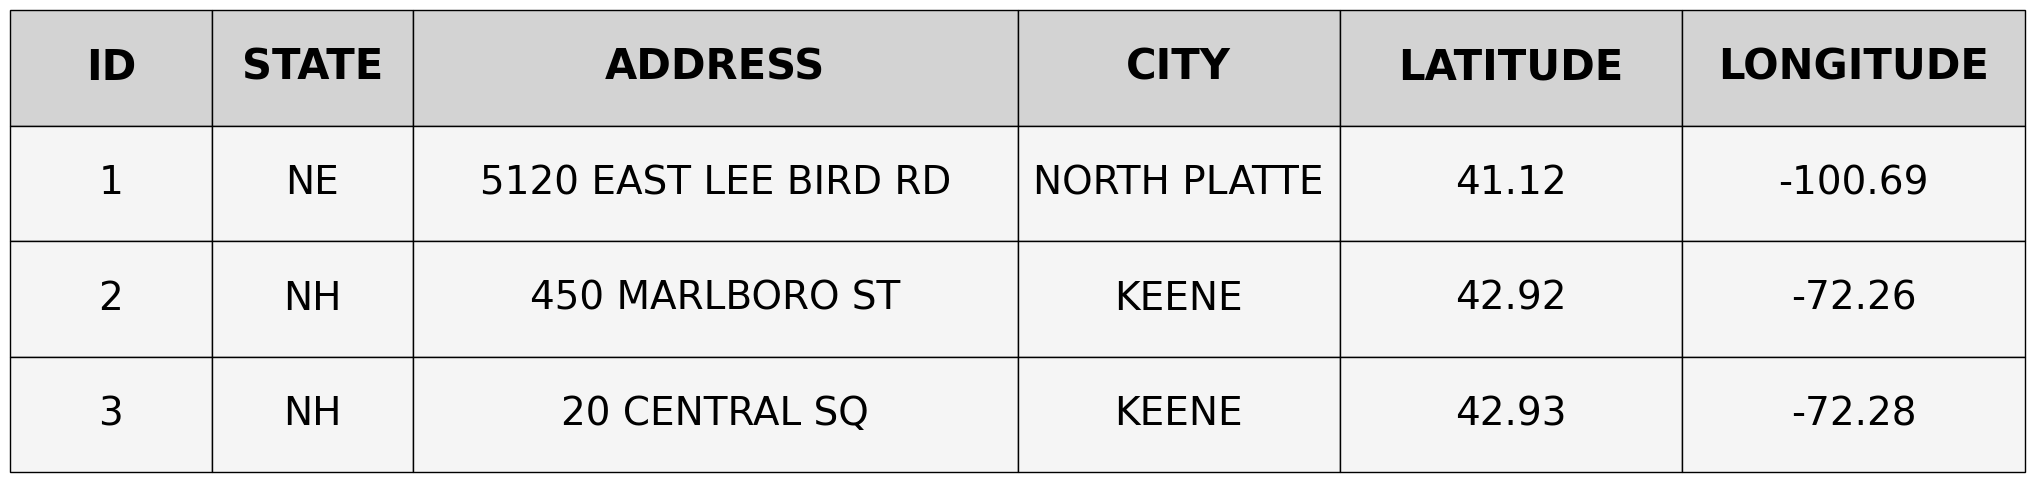

In [106]:
# Select relevant columns excluding 'LOCATION_TY' and display first 3 rows
dhl_usa = dhl_geojson[dhl_geojson['STATE'].notnull()]

selected_columns_excluded_location = dhl_usa[['ID', 'STATE', 'ADDRESS', 'CITY', 'LATITUDE', 'LONGITUDE']]
first_3_rows_excluded_location = selected_columns_excluded_location.head(3)

# Round the LATITUDE and LONGITUDE columns to 2 decimal places
first_3_rows_excluded_location = first_3_rows_excluded_location.round({'LATITUDE': 2, 'LONGITUDE': 2})

# Create a figure and axis

fig, ax = plt.subplots(figsize=(26, 6)) 
ax.axis('off')

# Create a table from the DataFrame
table = plt.table(cellText=first_3_rows_excluded_location.values,
                  colLabels=first_3_rows_excluded_location.columns,
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])


table.auto_set_font_size(False)
table.set_fontsize(28)  
for (i, j), cell in table.get_celld().items():
    cell.set_linewidth(1)
    if i == 0:
        cell.set_fontsize(30)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('lightgrey')
    else:
        cell.set_facecolor('whitesmoke')
        

# Set column width
col_widths = [0.1, 0.1, 0.3, 0.16, 0.17, 0.17]  # example column widths
for i in range(len(col_widths)):
    for j in range(len(first_3_rows_excluded_location.values) + 1):
        table[(j, i)].set_width(col_widths[i])
# Save the table as a high-resolution image file
plt.savefig('table_high_res.png', dpi=900, bbox_inches='tight')

# Show the table
plt.show()

C:\Users\Murad Aladdinzada\AppData\Local\Temp\ipykernel_12196\2628581202.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


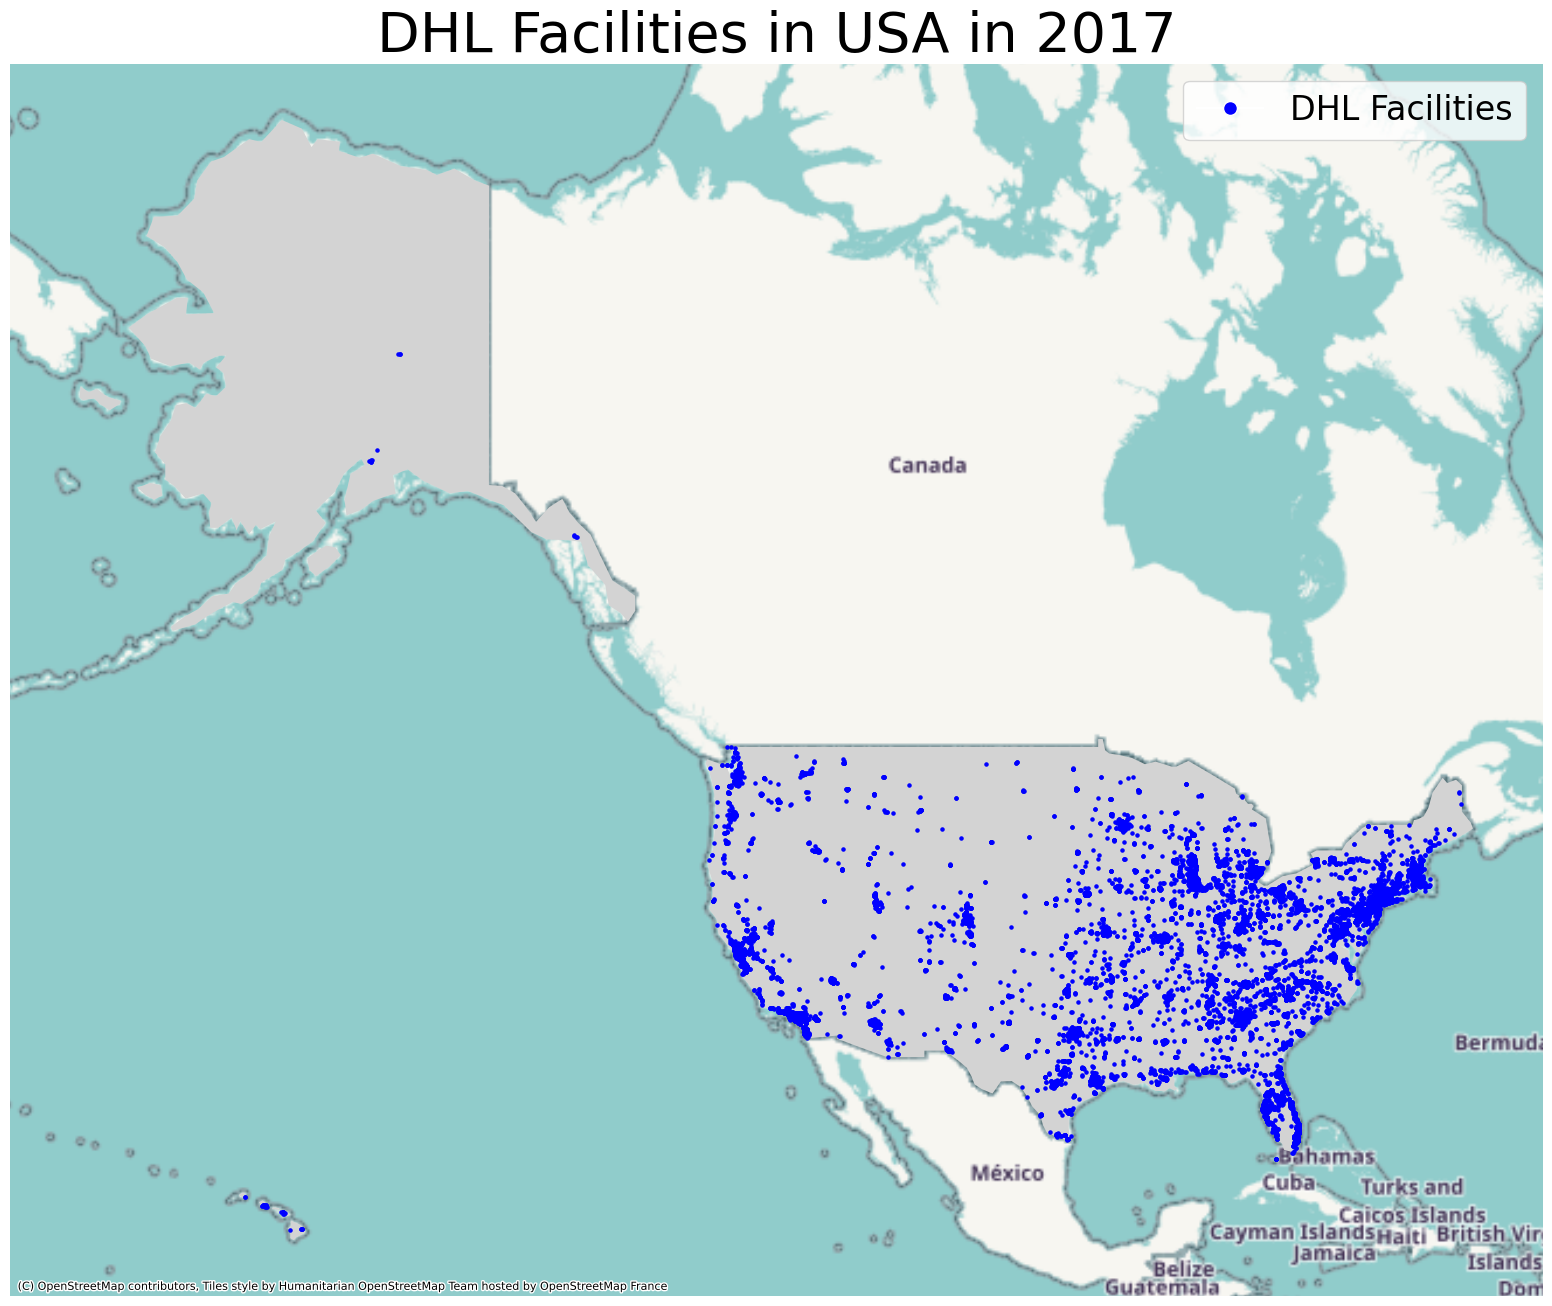

In [107]:


# Filter the data for facilities in the USA
dhl_usa = dhl_geojson[dhl_geojson['STATE'].notnull()]

# Convert latitude and longitude to geometry
geometry = [Point(xy) for xy in zip(dhl_usa['LONGITUDE'], dhl_usa['LATITUDE'])]
dhl_usa = gpd.GeoDataFrame(dhl_usa, geometry=geometry)

# Convert the GeoDataFrame to Web Mercator projection (EPSG 3857)
dhl_usa = dhl_usa.to_crs(epsg=3857)

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the data to only include the USA
usa = world[world['name'] == 'United States of America']

# Convert the world map data to Web Mercator projection (EPSG 3857)
usa = usa.to_crs(epsg=3857)

# Create the map
fig, ax = plt.subplots(figsize=(28, 16))
# fig, ax = plt.subplots(figsize=(28, 24))
usa.plot(ax=ax, color='lightgrey')

# Plot facilities using latitude and longitude
ax.scatter(dhl_usa.geometry.x, dhl_usa.geometry.y, color='blue', label='DHL Facilities',s=5)

# Add a background map
ctx.add_basemap(ax)


# Customize the appearance of the map
ax.set_title('DHL Facilities in USA in 2017', fontsize=40)

legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_handles, labels=['DHL Facilities'], fontsize=24)
ax.axis('off')
# Save the map as a high-resolution image file
plt.savefig('DHL_larger_image_with_background.png', dpi=900, bbox_inches='tight')

# Show the map
plt.show()


C:\Users\Murad Aladdinzada\AppData\Local\Temp\ipykernel_12196\2353689071.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


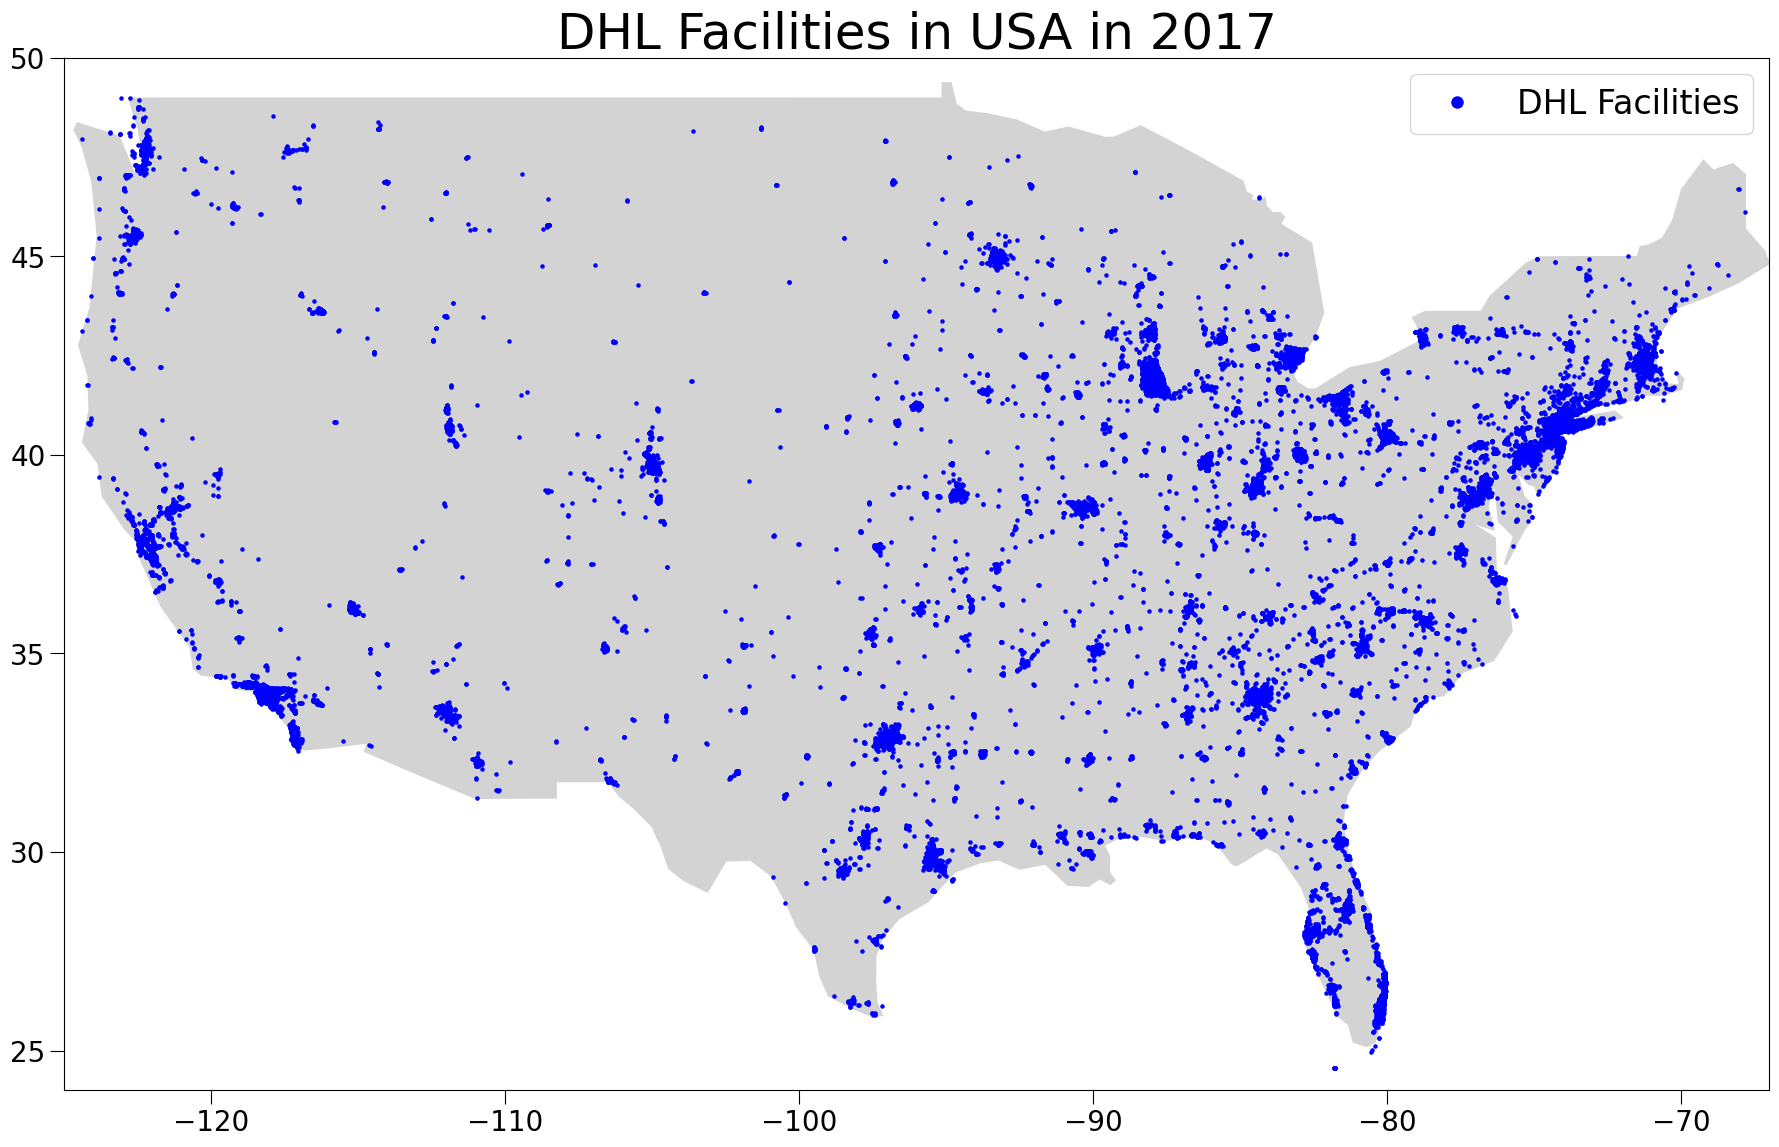

In [108]:


# Convert the GeoDataFrame to WGS 84 CRS (EPSG 4326)
dhl_usa = dhl_usa.to_crs(epsg=4326)

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the data to only include the USA
usa = world[world['name'] == 'United States of America']

# Create the map
fig, ax = plt.subplots(figsize=(22, 18))
usa.plot(ax=ax, color='lightgrey')
dhl_usa.plot(ax=ax, color='blue', markersize=5, label='DHL Facilities')

# Customize the appearance of the map
ax.set_title('DHL Facilities in USA in 2017', fontsize=36)
plt.legend(handles=legend_handles, labels=['DHL Facilities'], fontsize=24)

# Set the axis limits to focus on the main area of the USA
ax.set_xlim(-125, -67)
ax.set_ylim(24, 50)

# Set the tick sizes
ax.tick_params(axis='both', which='major', labelsize=20, size=10)

# Save the map as a high-resolution image file
plt.savefig('Main area image.png', dpi=900, bbox_inches='tight')

# Show the map
plt.show()


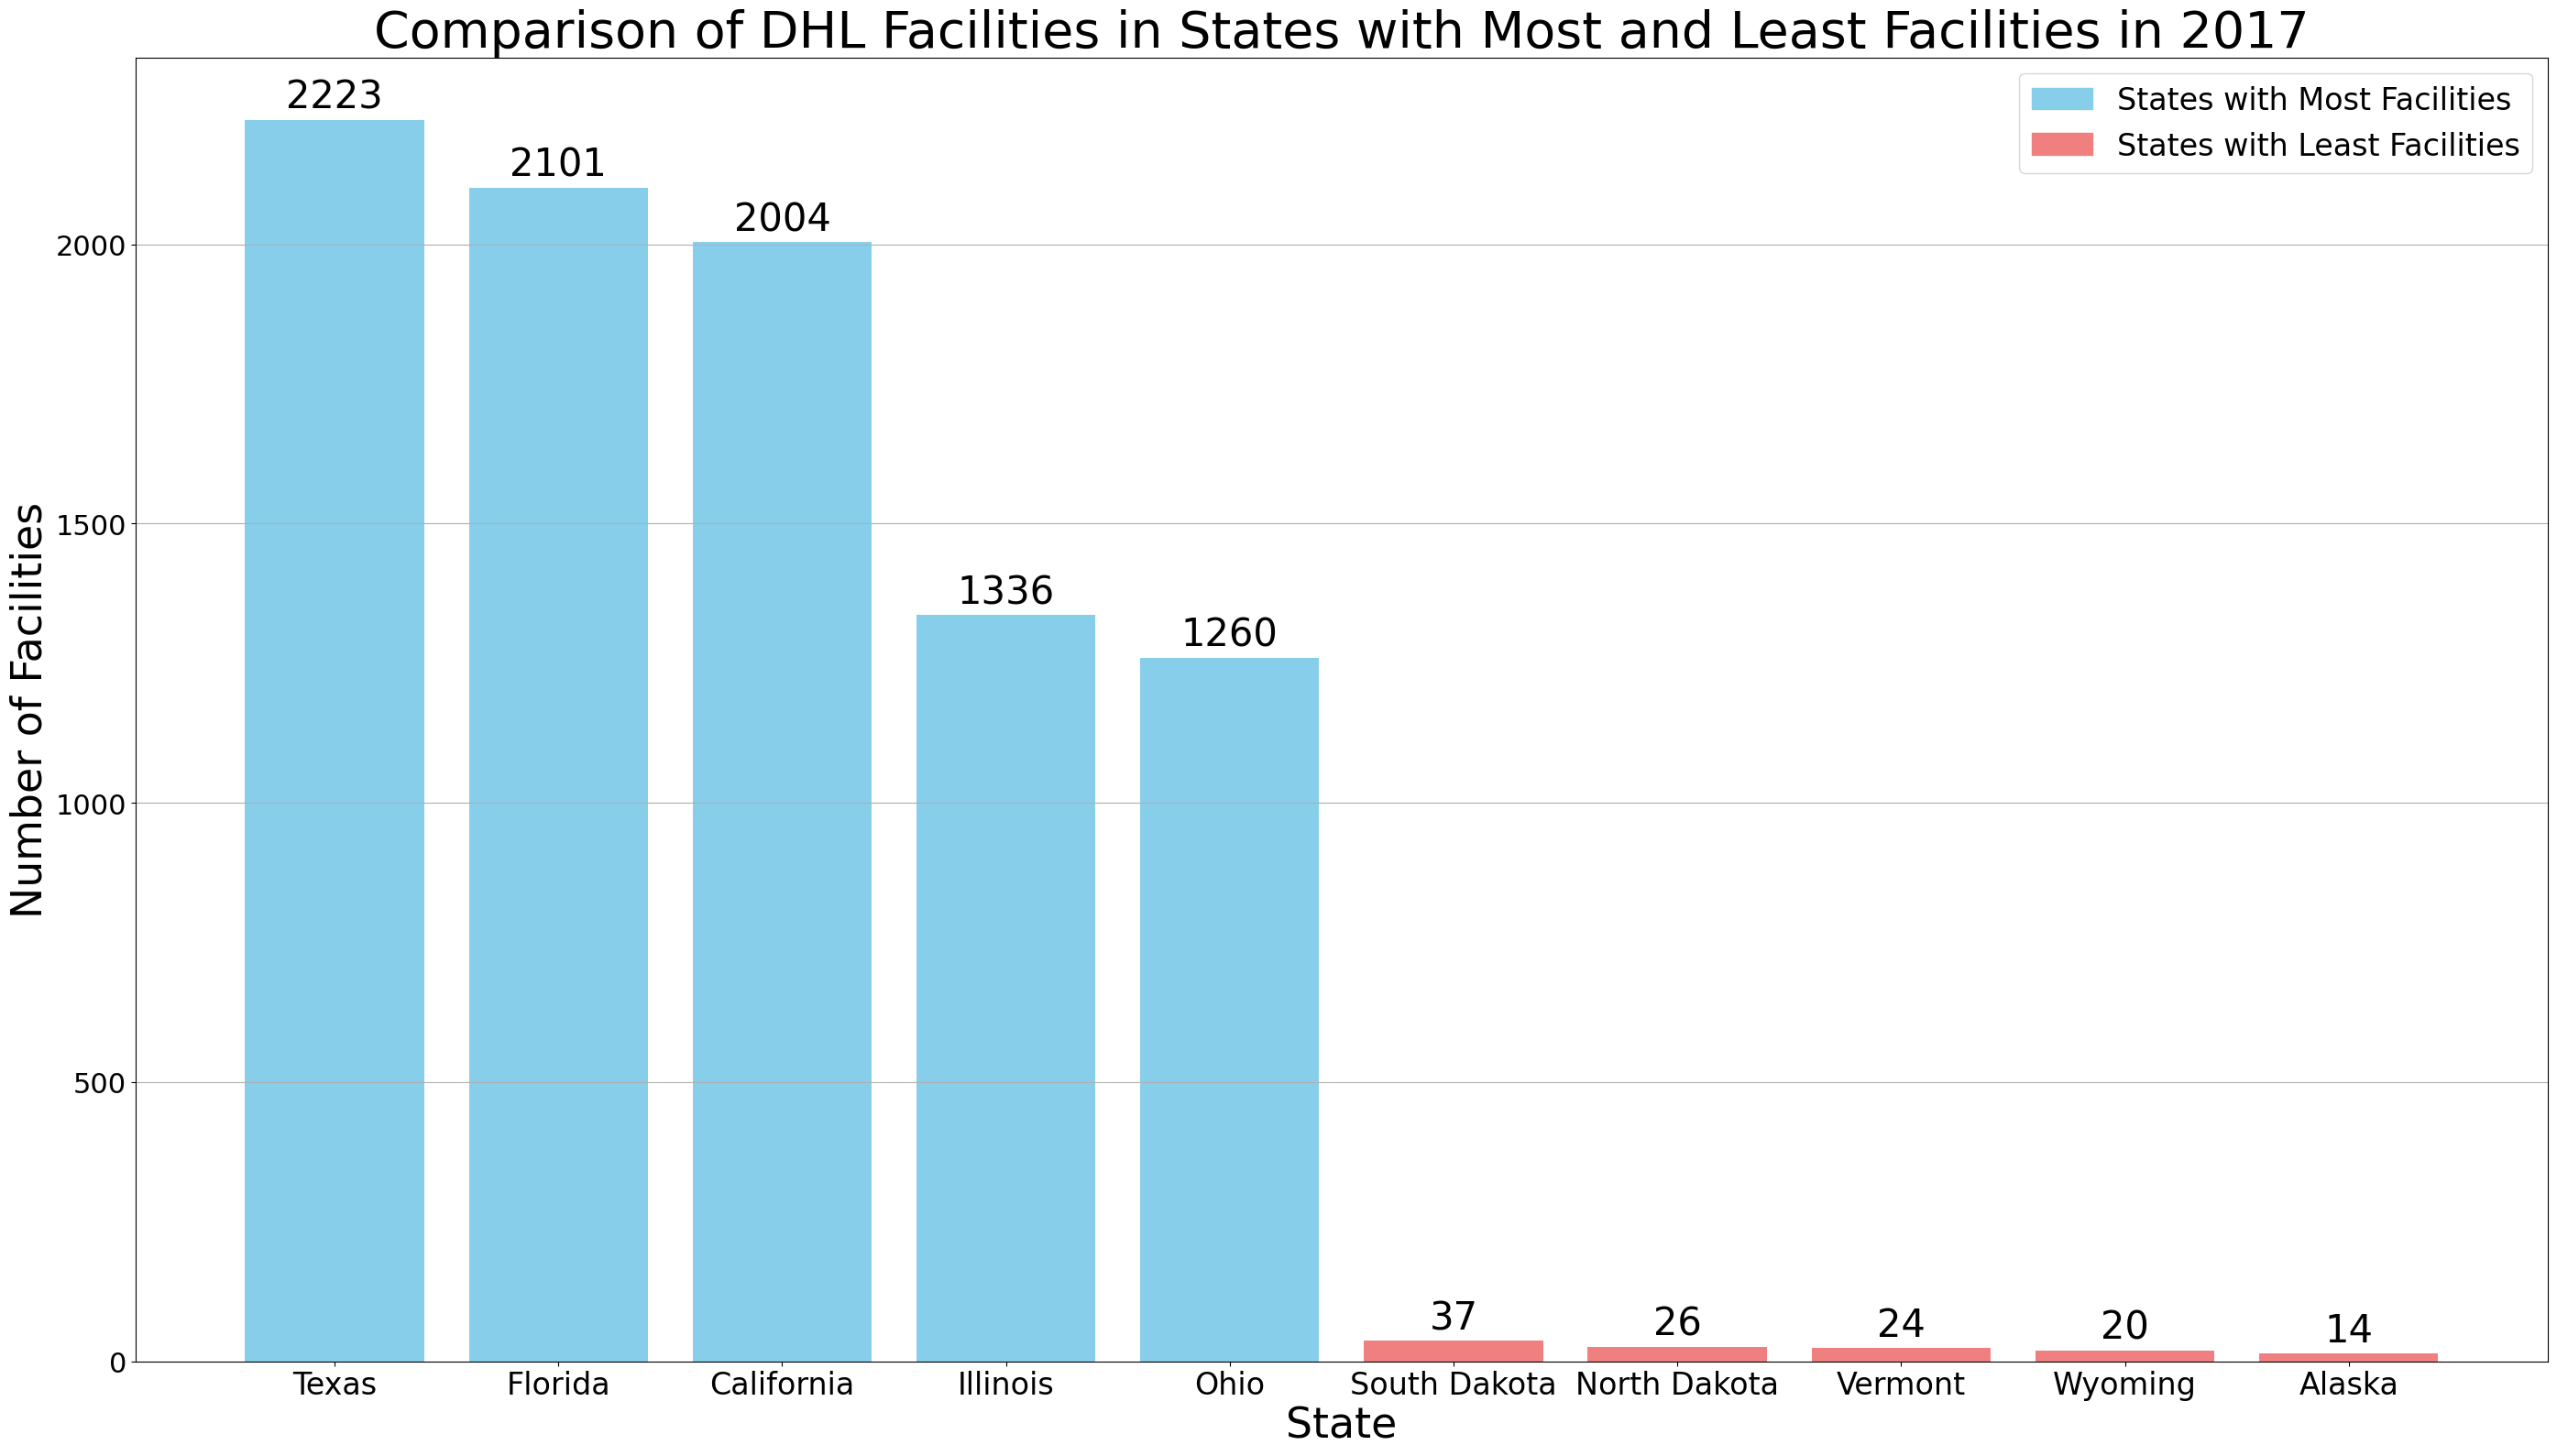

In [109]:

facility_count_by_state = dhl_usa['STATE'].value_counts()

# Convert state abbreviations to full names
state_full_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Convert state abbreviations in the index to full names
facility_count_by_state_full_names = facility_count_by_state.rename(index=state_full_names)

# Get the top 5 and bottom 5 states
top_5_states = facility_count_by_state_full_names.head(5)
bottom_5_states = facility_count_by_state_full_names.tail(5)

# Combine the top 5 and bottom 5 states
combined_states = pd.concat([top_5_states, bottom_5_states])

# Sort the combined states by facility count
sorted_combined_states_full_names = combined_states.sort_values(ascending=False)

# Define colors for the top 5 and bottom 5 states
colors = ['skyblue' if state in top_5_states.index else 'lightcoral' for state in sorted_combined_states_full_names.index]

# Create the combined bar chart
fig, ax = plt.subplots(figsize=(28, 16))
bars = ax.bar(sorted_combined_states_full_names.index, sorted_combined_states_full_names.values, color=colors)

# Annotate each bar with the facility count
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=30)

# Customize the appearance of the chart
ax.set_title('Comparison of DHL Facilities in States with Most and Least Facilities in 2017', fontsize=40)
ax.set_xlabel('State', fontsize=33)
ax.set_ylabel('Number of Facilities', fontsize=33)
ax.tick_params(axis='x', labelrotation=0, labelsize=24)
ax.tick_params(axis='y', labelsize=22)
ax.grid(axis='y')

# Add legend
legend_labels = ['States with Most Facilities', 'States with Least Facilities']
legend_colors = ['skyblue', 'lightcoral']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
plt.legend(legend_handles, legend_labels, fontsize=24)

# Save the figure with a high resolution
plt.tight_layout()
plt.savefig('Comparison_of_DHL_Facilities_in_States_with_Most_and_Least_Facilities.png', dpi=900)

# Show the chart
plt.show()
